# Import Lib and Dataset


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [184]:
data = pd.read_csv('heart.csv.xls')

In [185]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [186]:
data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

/var/folders/4t/flkqq_hn3474p78hfyx8dlz00000gn/T/ipykernel_66518/1177724787.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


# Display Top 5 Raws of Dataset

In [187]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Check The Last 5 Rows of The Dataset

In [188]:
data.tail

<bound method NDFrame.tail of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [189]:
data.shape

(1025, 14)

In [190]:
print ("Number of Rows", data. shape [0])
print ("Number of Columns", data. shape [1])

Number of Rows 1025
Number of Columns 14


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Check Null Values In The Dataset

In [192]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check For Duplicate Data and Drop Them

In [193]:
data_dup = data.duplicated().any()
print (data_dup)

True


In [194]:
data = data.drop_duplicates() 

In [195]:
data.shape

(302, 14)

# Get Overall Statistics About The Dataset

In [196]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

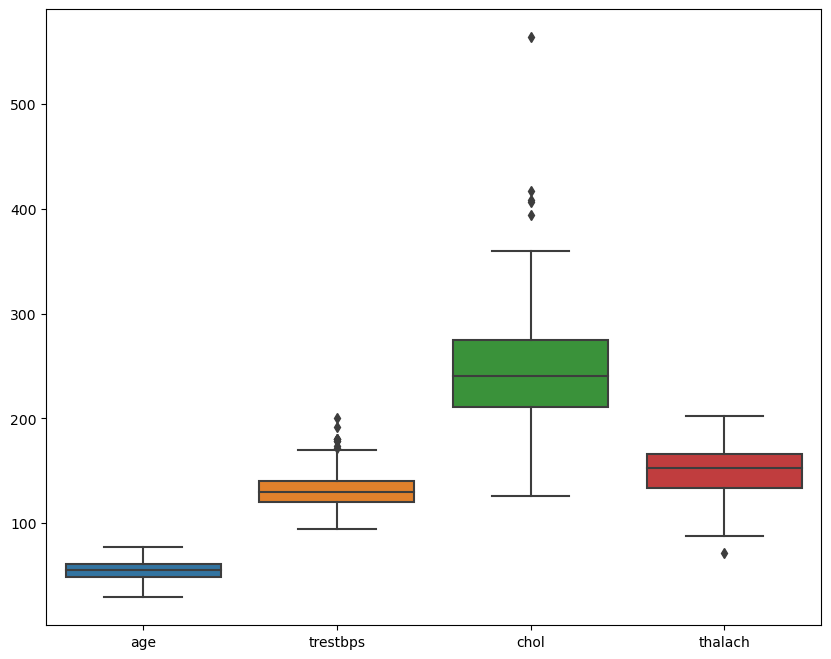

In [197]:
fig, ax = plt.subplots(figsize=(10,8))
vars_to_plot = ['age', 'trestbps', 'chol', 'thalach']
sns.boxplot(data=data[vars_to_plot])

# Draw Correlation Matrix 

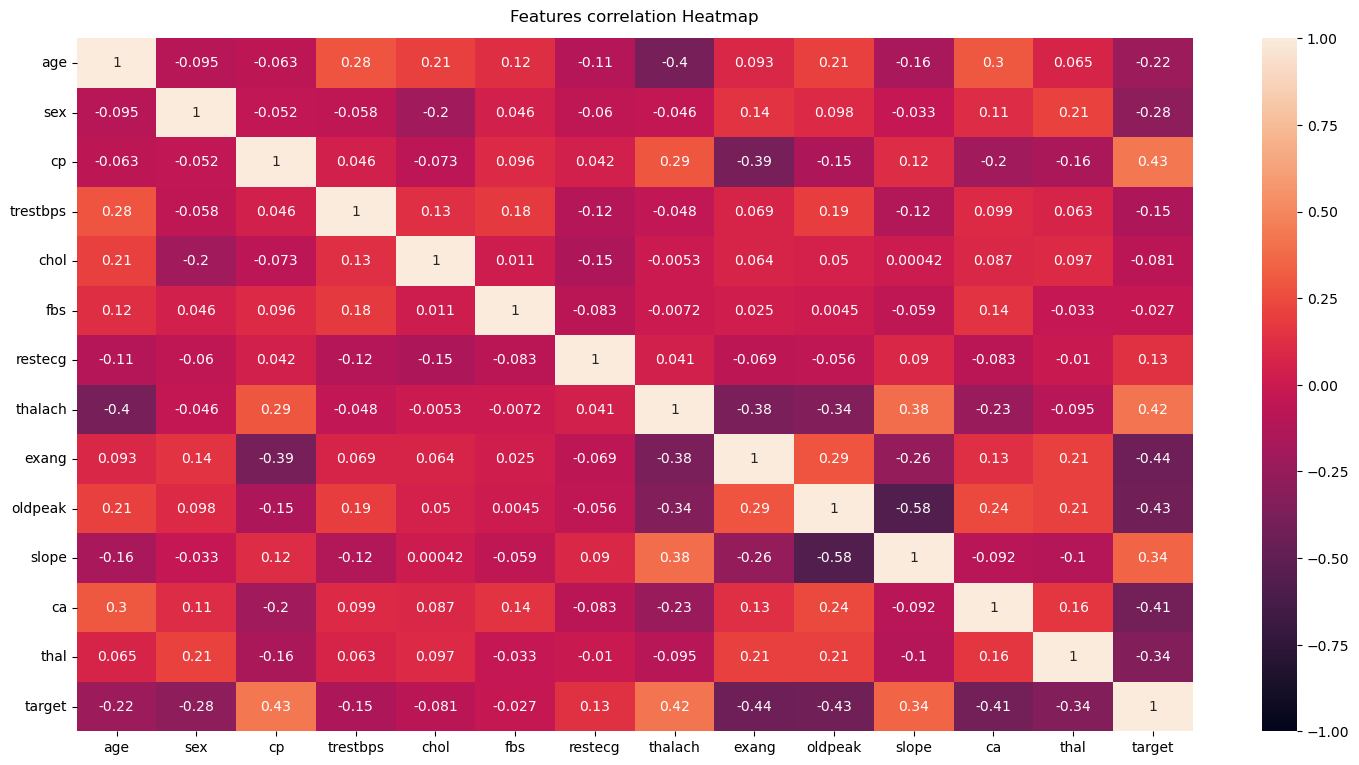

In [198]:
plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [199]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [200]:
data ['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

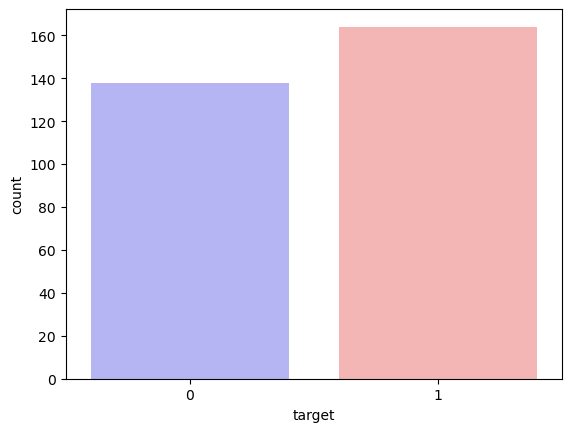

In [201]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

# Find Count of  Male & Female in this Dataset

In [202]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [203]:
print(data['sex'].value_counts())

1    206
0     96
Name: sex, dtype: int64


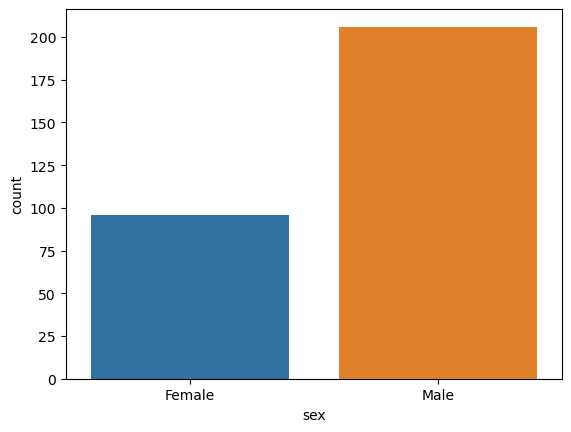

In [204]:
sns.countplot(x="sex", data=data)
plt.xticks([0,1], ['Female','Male'])

plt.show()

# Find Gender Distribution According to The Target Variable

In [205]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

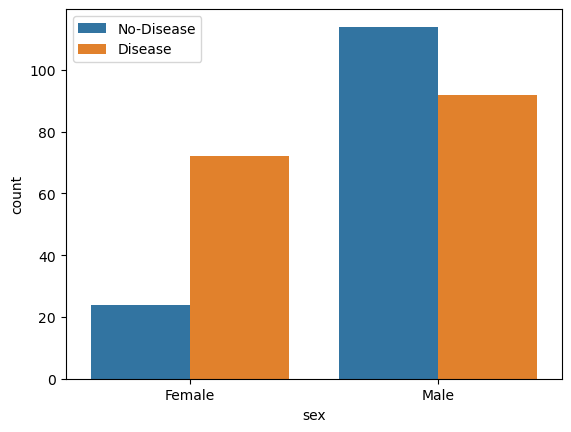

In [206]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

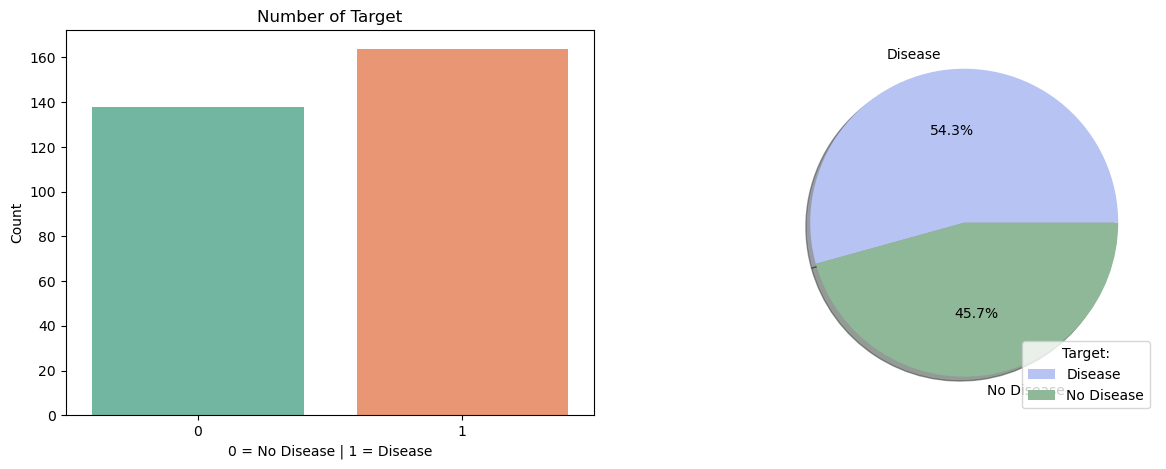

In [207]:

plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
sns.countplot(x = "target", data = data, palette = "Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.pie(data["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3",  "#8EB897"])
plt.legend(title = "Target:")

plt.show()

Here, out of 312 female 226 female show the symptoms for heart disease and out of 713 male 300 of them show the conditions for heart disease.

# Check Age Distribution In The Dataset

/var/folders/4t/flkqq_hn3474p78hfyx8dlz00000gn/T/ipykernel_66518/4281029158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=20)


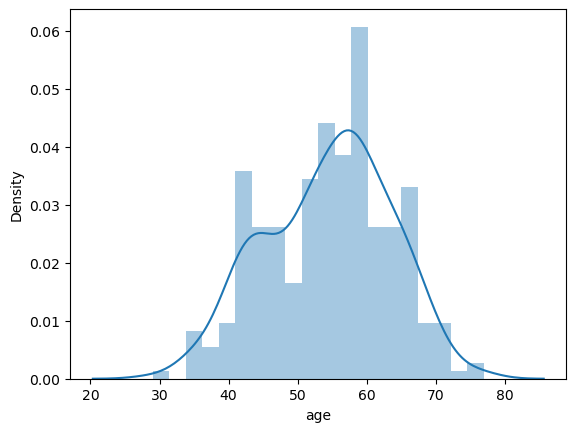

In [208]:
sns.distplot(data['age'],bins=20)
plt.show()

# Check Chest Pain Type

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

In [29]:
cp = data['cp'].value_counts().reset_index()
cp = cp.rename(columns = {'cp' : 'total_pasien'}).sort_values(by = 'total_pasien', ascending = False)
cp = cp.rename(columns = {'index' : 'chest_pain_type'}).sort_values(by = 'chest_pain_type', ascending = False)
cp

,chest_pain_type,total_pasien
3,3,23
1,2,86
2,1,50
0,0,143


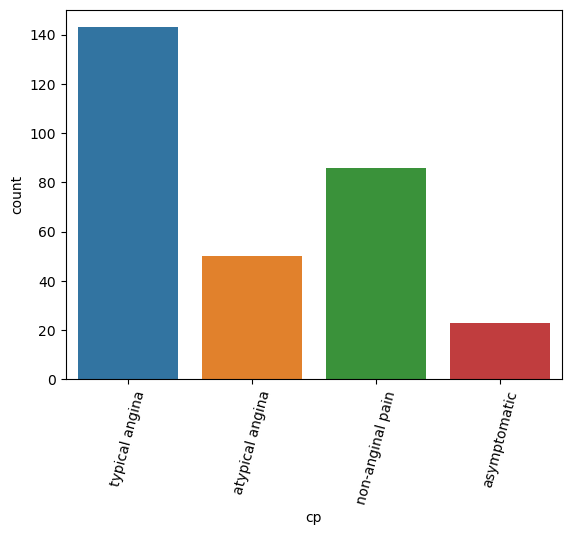

In [30]:
sns.countplot(x="cp", data=data)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=75)
plt.show()

# Show The Chest Pain Distribution As Per Target Variable

In [111]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [112]:
data=data['cp'].value_counts()
data

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

# Show Fasting Blood Sugar Distribution According To Target Variable

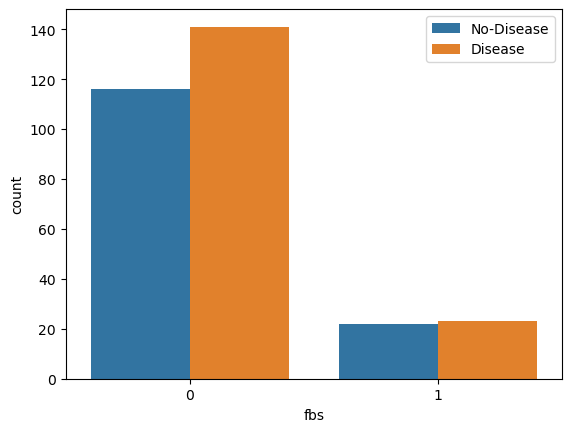

In [33]:
sns.countplot(x="fbs",hue="target",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

# Check Resting Blood Pressure Distribution

In [34]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

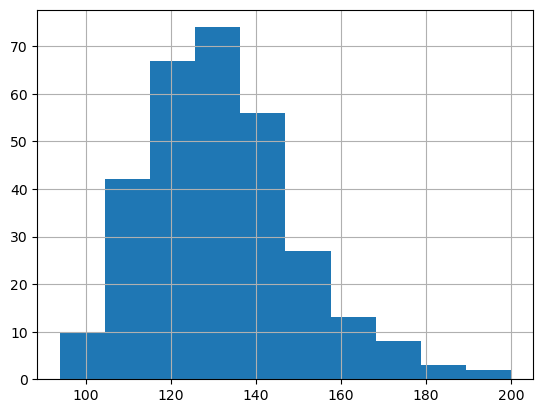

In [35]:
data['trestbps'].hist()

# Compare Resting Blood Pressure As Per Sex Column

/Users/ajaykaswan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/ajaykaswan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


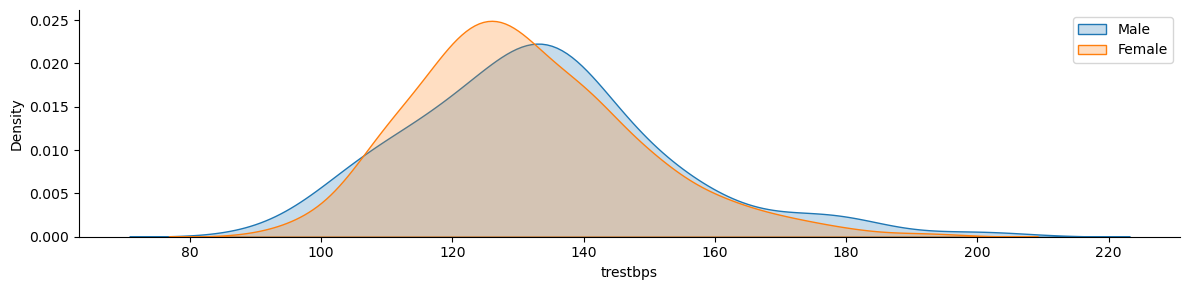

In [36]:
g = sns.FacetGrid(data, hue="sex", aspect=4)
g.map(sns.kdeplot,'trestbps', shade=True)
plt.legend(labels=["Male","Female"])


# Show Distribution of Serum cholesterol

In [37]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

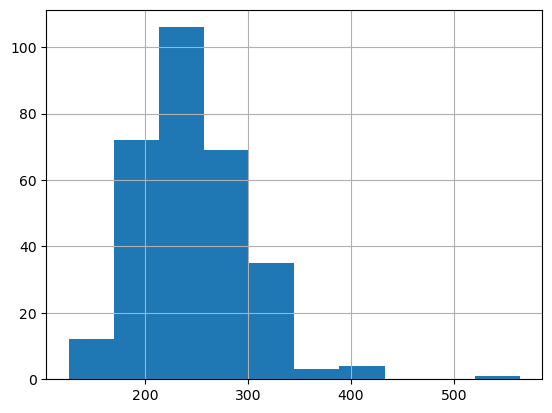

In [38]:
data['chol'].hist()

In [39]:
categorical = ['sex', 'cp', 'restecg', 'slope', 'thal']
do_not_touch = ['fbs', 'exang']
non_categorical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

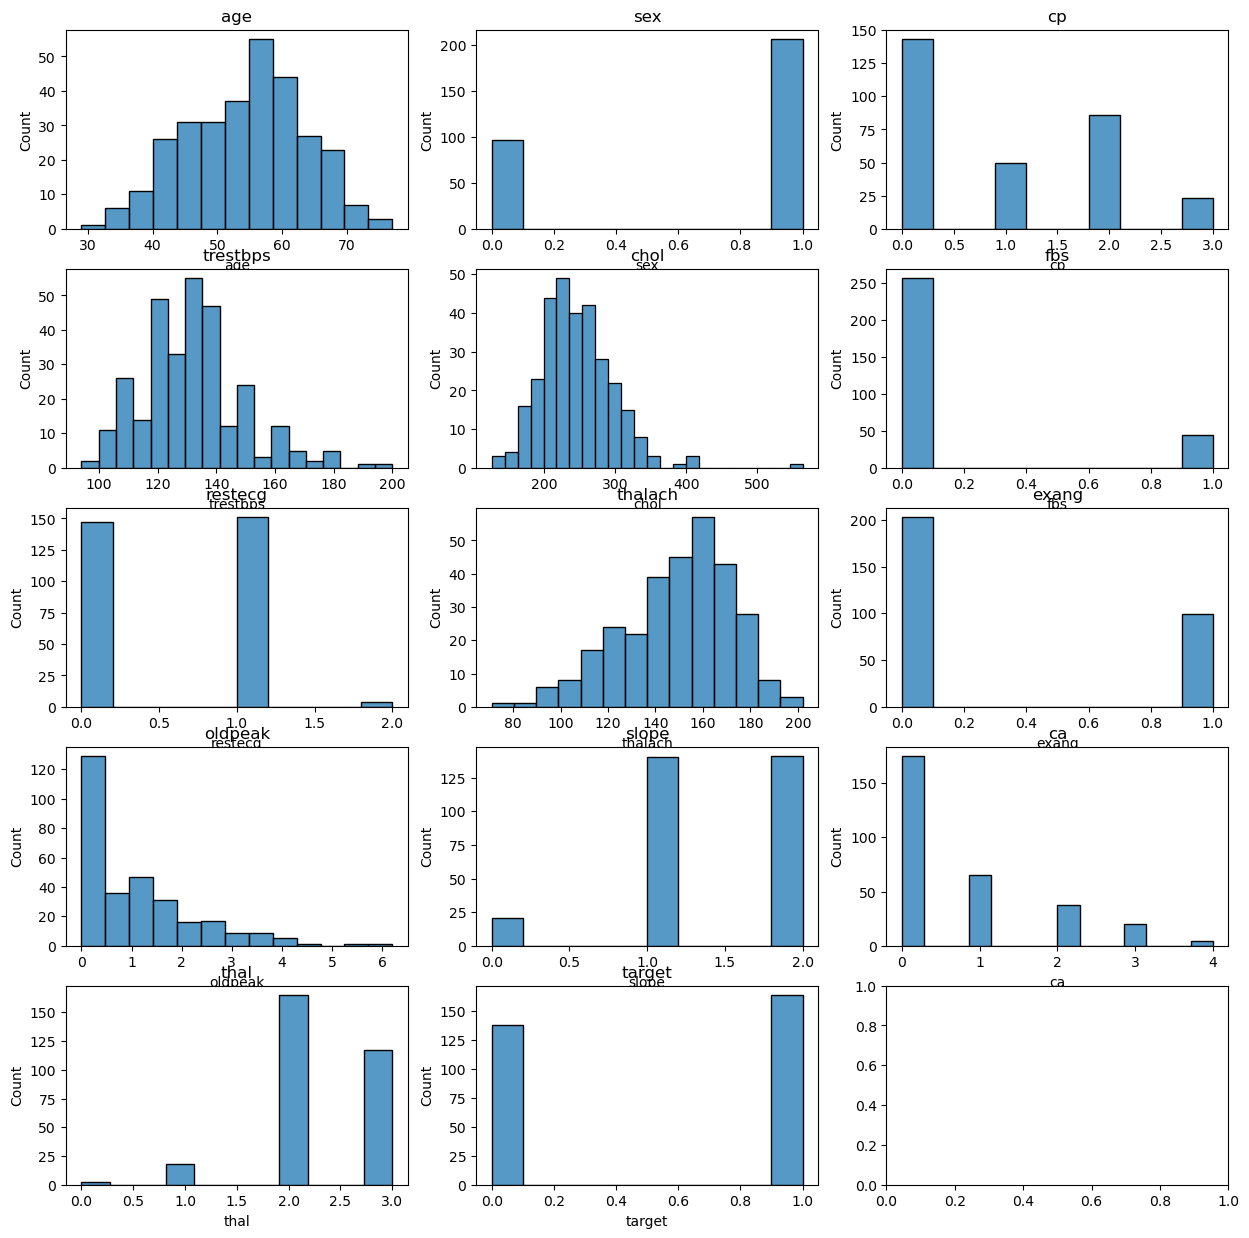

In [50]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    if i < len(data.columns):
        sns.histplot(data=data[data.columns[i]], ax=ax)
        ax.set_title(data.columns[i])

# Logistic Regression

In [56]:
x=data.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [59]:
y=data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [71]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [72]:
lr=LogisticRegression(max_iter=5000)

In [73]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy'))

[0.83516484 0.8021978  0.89010989 0.82417582 0.85714286 0.89010989
 0.8021978  0.83516484 0.78021978 0.83516484]


In [74]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy').mean())

0.8351648351648351


In [75]:
svc=SVC()

In [76]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy')) 
    

[0.56043956 0.62637363 0.72527473 0.64835165 0.59340659 0.75824176
 0.65934066 0.64835165 0.65934066 0.64835165]


In [77]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy').mean())

0.6527472527472529


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt=DecisionTreeClassifier()

In [81]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy'))

[0.73626374 0.73626374 0.79120879 0.75824176 0.8021978  0.76923077
 0.79120879 0.63736264 0.78021978 0.79120879]


In [82]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy').mean())


0.7604395604395604


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf=RandomForestClassifier()

In [86]:
 print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy'))

[0.81318681 0.84615385 0.86813187 0.8021978  0.83516484 0.85714286
 0.73626374 0.78021978 0.81318681 0.82417582]


In [90]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.8197802197802198


In [91]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [92]:
from xgboost import XGBClassifier

In [93]:
xgb=XGBClassifier()

In [94]:
print(cross_val_score(xgb,x,y,cv=cv,scoring='accuracy'))

[0.82417582 0.81318681 0.84615385 0.82417582 0.81318681 0.86813187
 0.73626374 0.76923077 0.79120879 0.79120879]


In [95]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.8120879120879121


# Logistic Regression model gives the max accuracy i.e. 84%

Min acc=83%

Max acc=85%

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [97]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [99]:
prediction=lr.predict(x_test)

In [100]:
lr.score(x_train,y_train)

0.8530805687203792

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(prediction, y_test))


              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.88      0.79      0.84        48

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



In [106]:
confusion_matrix(prediction,y_test)

array([[38,  5],
       [10, 38]])

In [107]:
%print(classification_report(prediction,y_test))

UsageError: Line magic function `%print(classification_report(prediction,y_test))` not found.


# Model is has an accuracy of 86%